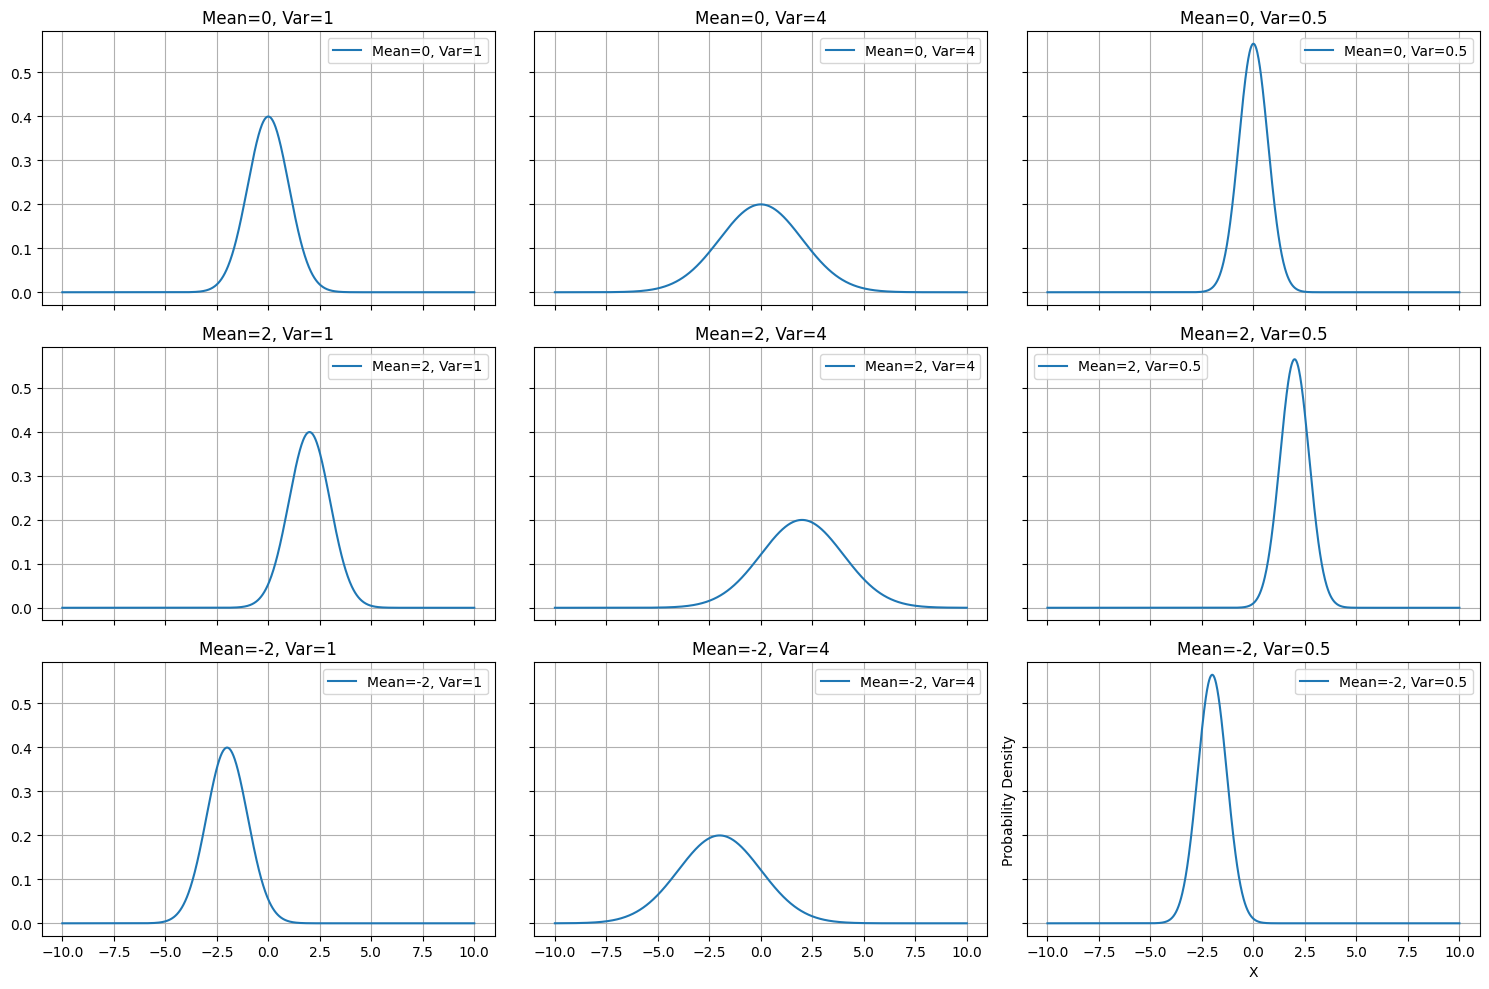

In [ ]:
# 1. Write a Python program that computes the value of the Gaussian distribution at a given vector X. Hence,
# plot the effect of varying mean and variance to the normal distribution.
# 1. Write a Python program that computes the value of the Gaussian distribution at a given vector X.
# Hence, plot the effect of varying mean and variance to the normal distribution.
import numpy as np
import matplotlib.pyplot as plt

def gaussian_distribution(x, mean, variance):

    sigma = np.sqrt(variance)
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) ** 2) / variance)

# Define range for x
x = np.linspace(-10, 10, 1000)

# Parameters to vary
means = [0, 2, -2]
variances = [1, 4, 0.5]

# Create subplots
fig, axes = plt.subplots(len(means), len(variances), figsize=(15, 10), sharex=True, sharey=True)

# Plot for varying means
for i, mean in enumerate(means):
    for j, variance in enumerate(variances):
        ax = axes[i, j]
        y = gaussian_distribution(x, mean, variance)
        ax.plot(x, y, label=f'Mean={mean}, Var={variance}')
        ax.set_title(f'Mean={mean}, Var={variance}')
        ax.legend()
        ax.grid(True)

# Set common labels
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()


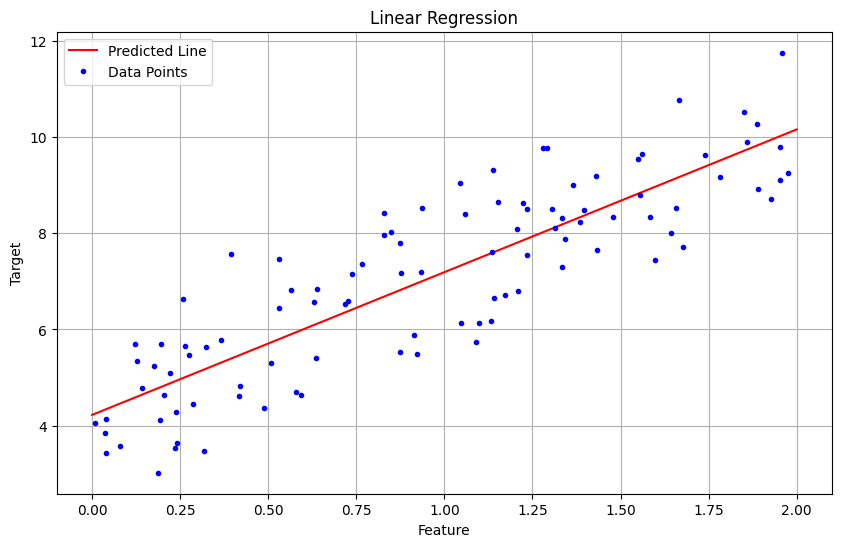

Intercept: 4.22215107744723
Slope: 2.968467510701018


In [ ]:
# 2. Write a python program to implement linear regression.
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100 data points, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3*X + noise

# Add bias term (x0 = 1) to each instance
X_b = np.c_[np.ones((100, 1)), X]  # Add a column of ones to X

# Compute the optimal parameters using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Extract the parameters
intercept, slope = theta_best

# Predict using the fitted model
X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_b = np.c_[np.ones((100, 1)), X_new]  # Add bias term
y_predict = X_new_b.dot(theta_best)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X_new, y_predict, "r-", label="Predicted Line")
plt.plot(X, y, "b.", label="Data Points")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

# Output the parameters
print(f"Intercept: {intercept[0]}")
print(f"Slope: {slope[0]}")


First few rows of the data:
            tmax  tmin  rain  tmax_tomorrow
1970-01-01  60.0  35.0   0.0           52.0
1970-01-02  52.0  39.0   0.0           52.0
1970-01-03  52.0  35.0   0.0           53.0
1970-01-04  53.0  36.0   0.0           52.0
1970-01-05  52.0  35.0   0.0           50.0


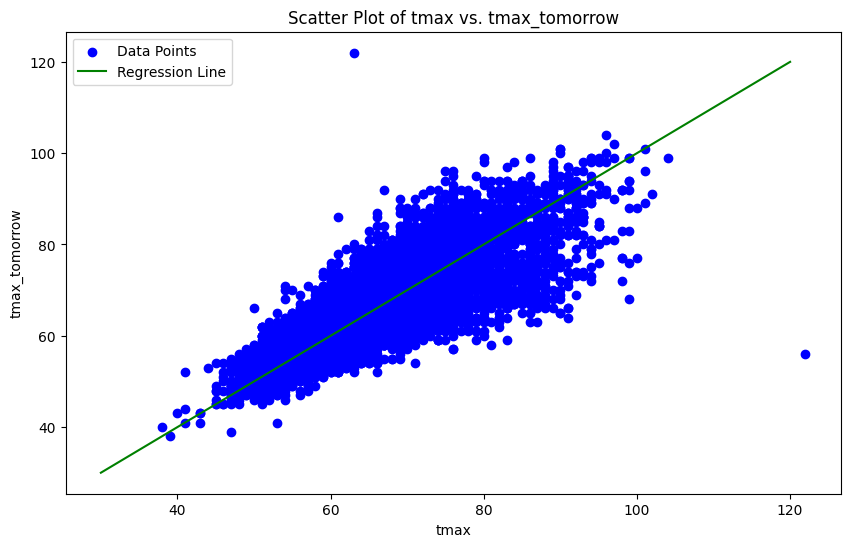


Linear Regression Model Parameters:
Weight: 0.82
Bias: 11.99


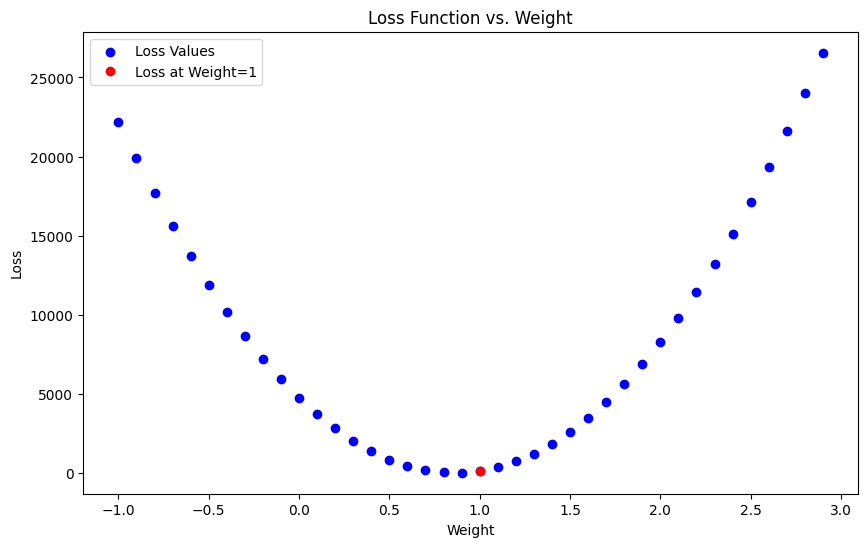

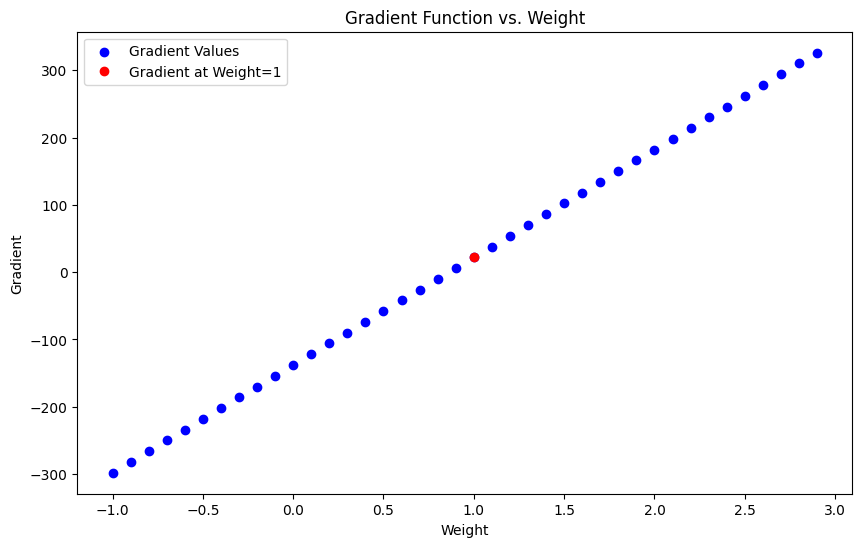

Epoch 0 validation loss: 297.28
Epoch 10000 validation loss: 22.65
Epoch 20000 validation loss: 22.61
Epoch 30000 validation loss: 22.58
Epoch 40000 validation loss: 22.55

Test MSE: 23.34


In [ ]:
# 3. Write a python program to implement gradient descent.
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import math

# Load and prepare the data
data_url = "/content/clean_weather.csv"  # Path to your dataset
data = pd.read_csv(data_url, index_col=0).ffill()  # Forward fill missing values

# Display the first few rows of the data
print("First few rows of the data:")
print(data.head())

# Plot the relationship between tmax and tmax_tomorrow
plt.figure(figsize=(10, 6))
plt.scatter(data["tmax"], data["tmax_tomorrow"], color='blue', label='Data Points')
plt.plot([30, 120], [30, 120], color='green', label='Regression Line')
plt.xlabel('tmax')
plt.ylabel('tmax_tomorrow')
plt.title('Scatter Plot of tmax vs. tmax_tomorrow')
plt.legend()
plt.show()

# Train a linear regression model
lr = LinearRegression()
lr.fit(data[["tmax"]], data["tmax_tomorrow"])

# Display the model parameters
print(f"\nLinear Regression Model Parameters:")
print(f"Weight: {lr.coef_[0]:.2f}")
print(f"Bias: {lr.intercept_:.2f}")

# Loss calculation
loss = lambda w, y: ((w * 80 + 11.99) - y) ** 2
ws = np.arange(-1, 3, 0.1)
losses = loss(ws, 81)

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.scatter(ws, losses, color='blue', label='Loss Values')
plt.plot(1, loss(1, 81), 'ro', label='Loss at Weight=1')
plt.xlabel('Weight')
plt.ylabel('Loss')
plt.title('Loss Function vs. Weight')
plt.legend()
plt.show()

# Gradient calculation
gradient = lambda w, y: ((w * 80 + 11.99) - y) * 2
gradients = gradient(ws, 81)

# Plot the gradient
plt.figure(figsize=(10, 6))
plt.scatter(ws, gradients, color='blue', label='Gradient Values')
plt.plot(1, gradient(1, 81), 'ro', label='Gradient at Weight=1')
plt.xlabel('Weight')
plt.ylabel('Gradient')
plt.title('Gradient Function vs. Weight')
plt.legend()
plt.show()

# Initialize model parameters
def init_params(predictors):
    k = math.sqrt(1 / predictors)
    np.random.seed(0)
    weights = np.random.rand(predictors, 1) * 2 * k - k
    biases = np.ones((1, 1)) * 2 * k - k
    return [weights, biases]

# Forward pass to make predictions
def forward(params, x):
    weights, biases = params
    return x @ weights + biases

# Mean Squared Error calculation
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

# Backward pass to update parameters
def backward(params, x, lr, grad):
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)
    params[0] -= w_grad * lr
    params[1] -= b_grad * lr
    return params

# Gradient Descent
lr = 1e-4
epochs = 50000
params = init_params(train_x.shape[1])

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)
    params = backward(params, train_x, lr, grad)

    if i % 10000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)
        print(f"Epoch {i} validation loss: {valid_loss:.2f}")

# Evaluate the model on the test set
predictions = forward(params, test_x)
test_loss = mse(test_y, predictions)
print(f"\nTest MSE: {test_loss:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


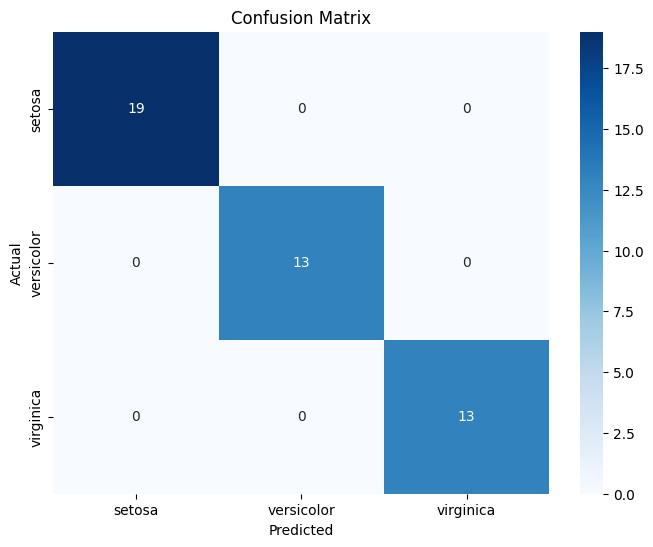

In [ ]:
# 4. Write a python program to classify different flower images using MLP.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

def load_and_preprocess_data():
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names
    class_names = iris.target_names

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, class_names

def build_and_train_model(X_train, y_train):
    # Create an MLP model
    model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    return model

def evaluate_model(model, X_test, y_test, class_names):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def main():
    X_train, X_test, y_train, y_test, class_names = load_and_preprocess_data()
    model = build_and_train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test, class_names)

if __name__ == "__main__":
    main()


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Accuracy: 0.44

Classification Report:
              precision    recall  f1-score   support

   dandelion       0.38      0.69      0.49       159
       daisy       0.39      0.33      0.35       120
      tulips       0.54      0.38      0.44       186
  sunflowers       0.59      0.37      0.45       138
       roses       0.44      0.42      0.43       131

    accuracy                           0.44       734
   macro avg       0.47      0.44      0.43       734
weighted avg       0.47      0.44      0.44       734


Confusion Matrix:
[[110  22   6  12   9]
 [ 58  39   3   6  14]
 [ 43  22  70  11  40]
 [ 51   8  22  51   6]
 [ 30  10  29   7  55]]


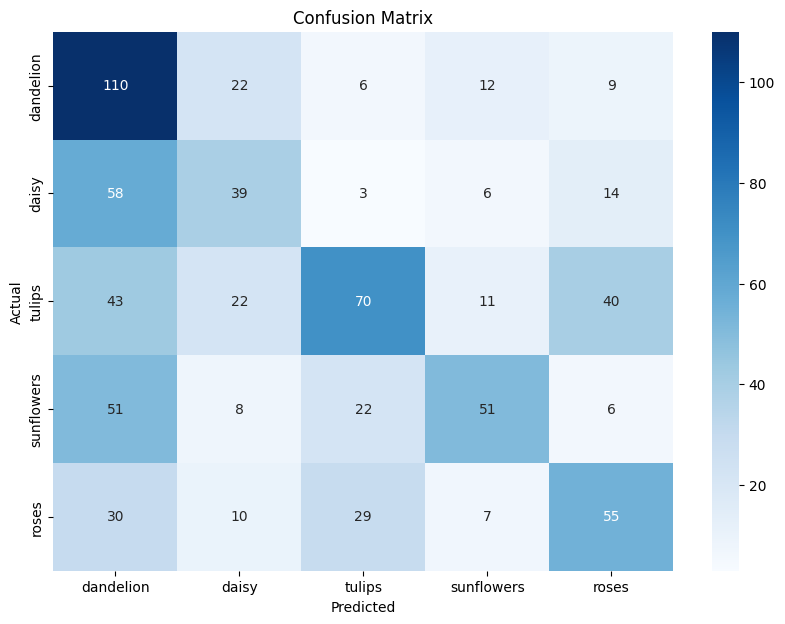

In [ ]:
# 5. Write a python program to classify different flower images using the SVM classifier.
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load flower dataset
def load_flower_data():
    # Load the Flowers dataset from TensorFlow Datasets
    dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:]'], shuffle_files=True)

    train_data, test_data = dataset

    # Preprocess and extract features
    def preprocess(image, label):
        image = tf.image.resize(image, [64, 64])  # Resize image to 64x64
        image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
        return image, label

    train_data = train_data.map(preprocess).batch(32).prefetch(1)
    test_data = test_data.map(preprocess).batch(32).prefetch(1)

    return train_data, test_data, info

# Extract features and labels
def extract_features_labels(data):
    features = []
    labels = []

    for images, batch_labels in data:
        features.extend(images.numpy().reshape(images.shape[0], -1))  # Flatten images
        labels.extend(batch_labels.numpy())

    return np.array(features), np.array(labels)

def main():
    # Load and preprocess data
    train_data, test_data, info = load_flower_data()

    # Extract features and labels
    X_train, y_train = extract_features_labels(train_data)
    X_test, y_test = extract_features_labels(test_data)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train SVM model
    model = svm.SVC(kernel='linear', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=info.features['label'].names))

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=info.features['label'].names, yticklabels=info.features['label'].names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.3096 - loss: 1.6208 - val_accuracy: 0.5886 - val_loss: 1.0543
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.5992 - loss: 1.0107 - val_accuracy: 0.6444 - val_loss: 0.9285
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6784 - loss: 0.8509 - val_accuracy: 0.6580 - val_loss: 0.8885
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7387 - loss: 0.6928 - val_accuracy: 0.6376 - val_loss: 0.9668
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7962 - loss: 0.5386 - val_accuracy: 0.6553 - val_loss: 1.0059
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8550 - loss: 0.4020 - val_accuracy: 0.6390 - val_loss: 1.1614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 

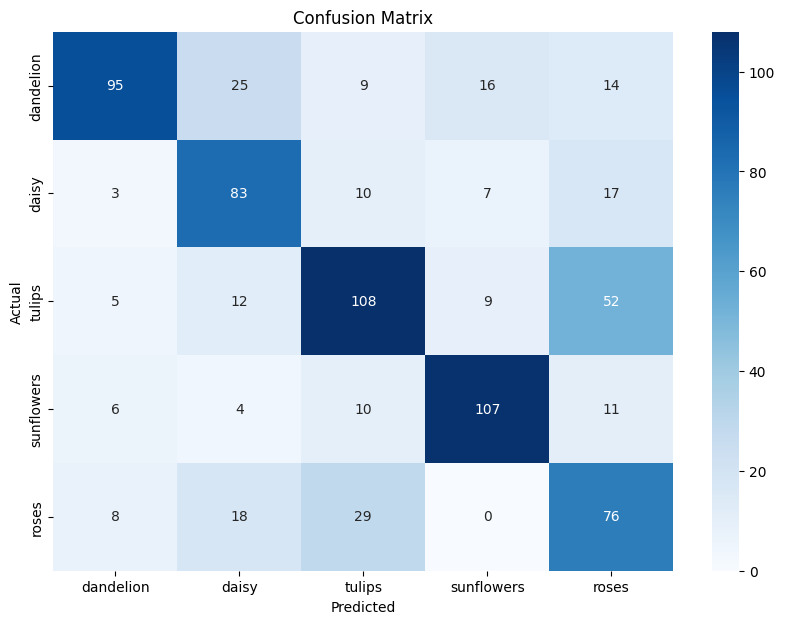

In [ ]:
# 6. Write a python program to classify different flower images using CNN.
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess flower dataset
def load_flower_data():
    # Load the Flowers dataset
    dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:]'], shuffle_files=True)
    train_data, test_data = dataset

    # Define preprocessing function
    def preprocess(image, label):
        image = tf.image.resize(image, [128, 128])  # Resize to 128x128
        image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
        return image, label

    # Apply preprocessing
    train_data = train_data.map(preprocess).batch(32).prefetch(1)
    test_data = test_data.map(preprocess).batch(32).prefetch(1)

    return train_data, test_data, info

# Build CNN model
def build_cnn_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Evaluate model performance
def evaluate_model(model, test_data, info):
    # Make predictions
    y_true = []
    y_pred = []

    for images, labels in test_data:
        predictions = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(predictions, axis=1))

    # Convert lists to arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Evaluate the model
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=info.features['label'].names))

    conf_matrix = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=info.features['label'].names, yticklabels=info.features['label'].names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def main():
    # Load and preprocess data
    train_data, test_data, info = load_flower_data()

    # Build and train CNN model
    num_classes = len(info.features['label'].names)
    model = build_cnn_model(num_classes)

    # Use EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    history = model.fit(train_data,
                        epochs=20,
                        validation_data=test_data,
                        callbacks=[early_stopping])

    # Evaluate model performance
    evaluate_model(model, test_data, info)

if __name__ == "__main__":
    main()


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        83
           3       0.99      0.97      0.98        93
           4       1.00      1.00      1.00        93
           5       0.99      0.98      0.98        99
           6       1.00      0.98      0.99        98
           7       0.98      0.99      0.98        87
           8       0.97      1.00      0.98        83
           9       0.97      0.97      0.97        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



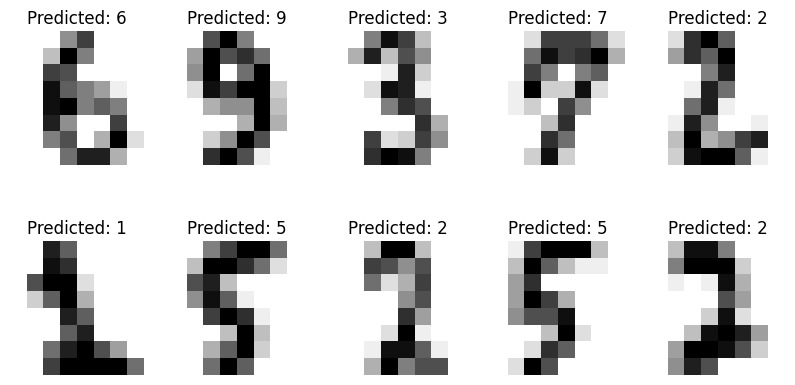

In [ ]:
# 7. Write a python program to classify different handwritten character images using the SVM classifier.
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
digits = datasets.load_digits()
X = digits.images
y = digits.target

# Flatten the images
n_samples = len(X)
X = X.reshape((n_samples, -1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the SVM classifier
clf = SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize some predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')
plt.show()


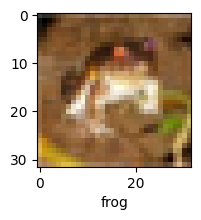

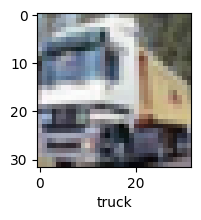

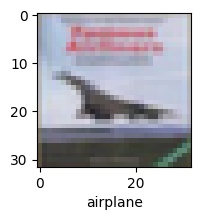

In [ ]:
# 8. Write a python program to classify different face images using CNN.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
X_test.shape

y_train.shape
y_train[:5]

y_train = y_train.reshape(-1,)
y_train[:5]
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)
plot_sample(X_test, y_test,3)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
 #9. Write a python program to identify a person from the walking style (gait recognition) using convolutional recurrent neural network.
 import tensorflow as tf
 from tensorflow.keras import layers, models
 model = models.Sequential([
 layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.RepeatVector(10),
 layers.LSTM(64, return_sequences=True),
 layers.TimeDistributed(layers.Dense(1, activation='sigmoid'))
 ])
 7
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
 print("Model summary for gait recognition:")
 model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model summary for gait recognition:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 10, 25088)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 10, 64)              │       6,439,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 10, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,513,729 (24.85 MB)

 Trainable params: 6,513,729 (24.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained models without the top classification layer
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
densenet_base = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)

# Define the model architecture using Functional API
def create_model(base_model):
    # Freeze the base model
    base_model.trainable = False

    # Define the input layer
    inputs = layers.Input(shape=input_shape)

    # Pass the input through the base model
    x = base_model(inputs, training=False)

    # Add custom layers on top of the base model
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    # Create the final model
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

vgg16_model = create_model(vgg16_base)
densenet_model = create_model(densenet_base)

print("VGG-16 model summary:")
vgg16_model.summary()
print("DenseNet-201 model summary:")
densenet_model.summary()

# Data directories
train_dir = 'path_to_train_data'
validation_dir = 'path_to_validation_data'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# Train the models
epochs = 10

print("Training VGG-16 model...")
vgg16_history = vgg16_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

print("Training DenseNet-201 model...")
densenet_history = densenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

print("Training complete.")


VGG-16 model summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

DenseNet-201 model summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet201 (Functional)             │ (None, 7, 7, 1920)          │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 94080)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │      24,084,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,406,977 (161.77 MB)

 Trainable params: 24,084,993 (91.88 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_train_data'

In [ ]:
 #10. Write a python program to classify breast cancer from histopathological images using VGG-16 and DenseNet-201 CNN architectures
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained VGG16 and DenseNet201 models without the top layer
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to create a model with a base pre-trained model
def create_model(base_model):
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create models using VGG16 and DenseNet201 as base models
vgg16_cancer_model = create_model(vgg16_model)
densenet_cancer_model = create_model(densenet_model)

# Print the summary of both models
print("VGG-16 model summary:")
vgg16_cancer_model.summary()

print("DenseNet-201 model summary:")
densenet_cancer_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
VGG-16 model summary:


ValueError: Undefined shapes are not supported.